In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('laptop_data_train.csv')
df.head()

,Number,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Number              0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [17]:
df.head()

,Number,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [18]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [19]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [20]:
# Split the 'ScreenResolution' column by 'x' and expand it into separate columns
resolution_split = df['ScreenResolution'].str.split('x', expand=True)

# Extract screen resolution width and height from the split columns
df['ResolutionWidth'] = resolution_split[0].str.extract('(\d+)').astype(int)
df['ResolutionHeight'] = resolution_split[1].str.extract('(\d+)').astype(int)

# Drop the original 'ScreenResolution' column
df.drop('ScreenResolution', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            901 non-null    int64  
 1   Company           901 non-null    object 
 2   TypeName          901 non-null    object 
 3   Inches            901 non-null    float64
 4   Cpu               901 non-null    object 
 5   Ram               901 non-null    int32  
 6   Memory            901 non-null    object 
 7   Gpu               901 non-null    object 
 8   OpSys             901 non-null    object 
 9   Weight            901 non-null    float32
 10  Price             901 non-null    float64
 11  ResolutionWidth   901 non-null    int64  
 12  ResolutionHeight  901 non-null    int64  
dtypes: float32(1), float64(2), int32(1), int64(3), object(6)
memory usage: 84.6+ KB


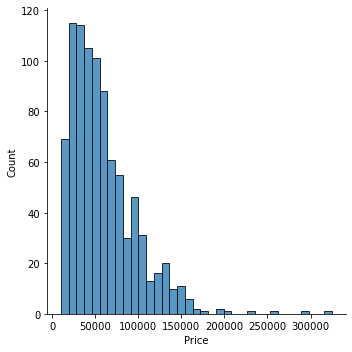

In [22]:

sns.displot(df['Price'])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [24]:
X_train = df.drop(['Price', 'Number'], axis=1)  # Drop 'Price' which is the target and 'Number' which is just an index
y_train = df['Price']

In [25]:
X_train.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,ResolutionWidth,ResolutionHeight
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2560,1600


In [26]:
y_train.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [28]:
# Defining numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [33]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [29]:
df_test = pd.read_csv('laptop_data_test.csv')

In [30]:
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(int)
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)

In [31]:
# Split the 'ScreenResolution' column by 'x' and expand it into separate columns
resolution_split_test = df_test['ScreenResolution'].str.split('x', expand=True)

# Extract screen resolution width and height from the split columns
df_test['ResolutionWidth'] = resolution_split_test[0].str.extract('(\d+)').astype(int)
df_test['ResolutionHeight'] = resolution_split_test[1].str.extract('(\d+)').astype(int)

# Drop the original 'ScreenResolution' column
df_test.drop('ScreenResolution', axis=1, inplace=True)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            402 non-null    int64  
 1   Company           402 non-null    object 
 2   TypeName          402 non-null    object 
 3   Inches            402 non-null    float64
 4   Cpu               402 non-null    object 
 5   Ram               402 non-null    int64  
 6   Memory            402 non-null    object 
 7   Gpu               402 non-null    object 
 8   OpSys             402 non-null    object 
 9   Weight            402 non-null    float64
 10  Price             402 non-null    float64
 11  ResolutionWidth   402 non-null    int64  
 12  ResolutionHeight  402 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 41.0+ KB


In [34]:
X_test = df_test.drop(['Price', 'Number'], axis=1)  # Drop 'Price' which is the target and 'Number' which is just an index
y_test = df_test['Price']

In [37]:
X_test.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,ResolutionWidth,ResolutionHeight
0,Asus,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,1920,1080
1,Dell,2 in 1 Convertible,13.3,Intel Core i7 7Y75 1.3GHz,16,256GB SSD,Intel HD Graphics 615,Windows 10,1.22,1920,1080
2,Lenovo,Ultrabook,14.0,Intel Core i7 7500U 2.7GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,1920,1080
3,Lenovo,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.95,1920,1080
4,LG,Ultrabook,15.6,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.08,1920,1080


In [35]:
# Defining the Support Vector Regression model
svr_model = SVR(kernel='linear')

# Creating a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', column_transformer),
                           ('model', svr_model)])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse

37185.972605597184